## Table of Contents

- [1. Importing Libraries](#importing)
- [2. Importing the Netflix Dataset](#dataset)
- [3. Data Cleaning and Transformation](#data-cleaning)
- [4. Questions](#questions)
    - [Q.1 How has the distribution of content ratings changed over time?](#q1)
    - [Q.2 Is there a relationship between content age and its type (Movie vs. TV Show)?](#q2)
    - [Q.3 Can we identify any trends in content production based on the release year vs. the year added to Netflix?](#q3)
    - [Q.4 What are the most common word pairs or phrases in content description?](#q4)
    - [Q.5 Who are the top directors on Netflix?](#q5)


# Importing Libraries <a id='importing'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_theme(style="darkgrid")

# Importing the Netflix Dataset <a id='dataset'></a>

In [2]:
file_path = "/Users/rajanti/Desktop/21_days_gfg/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv"
netflix_df = pd.read_csv(file_path)

In [3]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Data Cleaning and Transformation <a id='data-cleaning'></a>

In [4]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df["director"] = netflix_df["director"].fillna("Unknown")
netflix_df["cast"] = netflix_df["cast"].fillna("Unknown")

# 2. Handle missing 'country'
# We'll fill them with the mode, which is the most common country.
mode_country = netflix_df["country"].mode()[0]
netflix_df["country"] = netflix_df["country"].fillna(mode_country)

# 3. Drop the few rows with missing 'date-added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in data formats
netflix_df["date_added"] = pd.to_datetime(
    netflix_df["date_added"], format="mixed", dayfirst=False
)

# 5. Create new features for year and month added
netflix_df["year_added"] = netflix_df["date_added"].dt.year
netflix_df["month_added"] = netflix_df["date_added"].dt.month

In [6]:
# Verify our cleaning and transformation
print("Missing values after cleaning: ")
print(netflix_df.isnull().sum())
print("\nDate types after transformation: ")
print(netflix_df.dtypes)

Missing values after cleaning: 
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Date types after transformation: 
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


# Questions <a id='questions'></a>

### Q.1 How has the distribution of content ratings changed over time? <a id='q1'></a>

This is solved by 
1. Assuming that the time represents when the title was added on netflix (`year_added`)
2. Assuming that the time represents when the title was released (`release_year`)

#### 1.1 Distribution of Netflix's content ratings changed over time (Here time is assumed as `year_added`, which is obtained from the column `date_added` by performing some data cleaning and transformation)

<Figure size 1400x700 with 0 Axes>

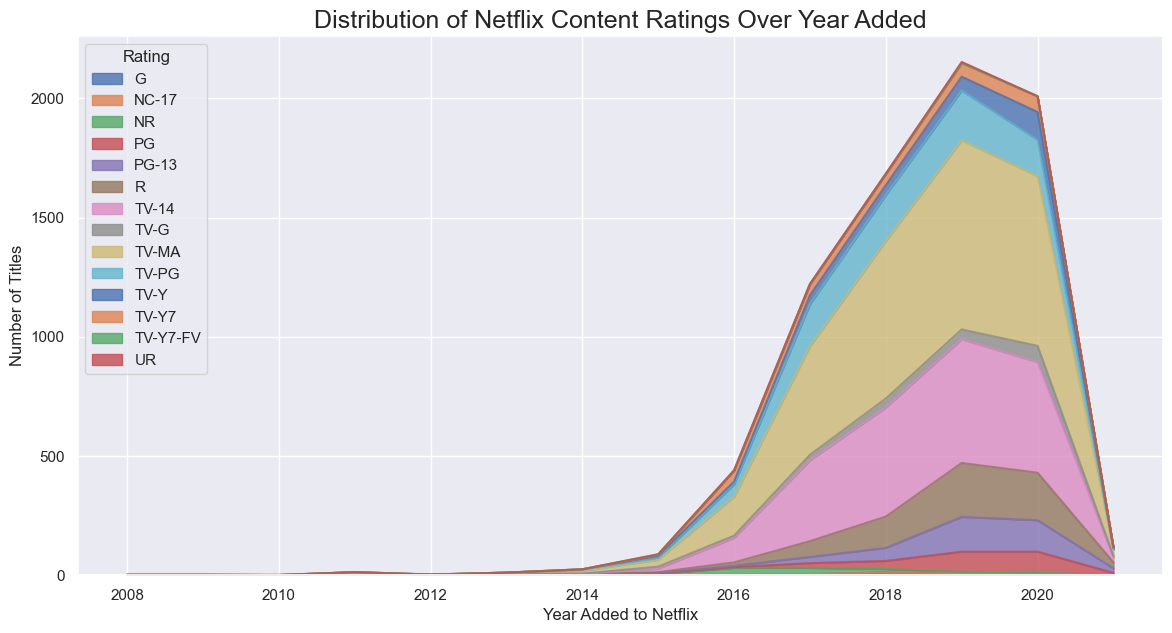

In [7]:
# Group by year_added and rating to see changes over time
rating_over_year_added = (
    netflix_df.groupby(["year_added", "rating"]).size().unstack().fillna(0)
)

plt.figure(figsize=(14, 7))
rating_over_year_added.plot(kind="area", stacked=True, figsize=(14, 7), alpha=0.8)
plt.title("Distribution of Netflix Content Ratings Over Year Added", fontsize=18)
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.show()

**Insights**:
- **2008–2012**: Very few titles were added, mostly with adult-oriented ratings like TV-MA.
- **2013–2016**: A broader mix appeared — more TV-14, PG-13, and PG content joined.
- **2017–2020**: There’s a sharp growth in all categories, especially TV-MA (mature content) and TV-14 (teen-friendly).
- Children’s ratings (TV-Y, TV-Y7, G, PG) grew as well, but at a much smaller scale compared to mature content.

Overall, Netflix’s library has increasingly leaned towards mature-rated shows (TV-MA), while still expanding in family and teen-friendly categories.

#### 1.2 Distribution of content ratings changed over time (Here time is assumed as `release_year`)

<Figure size 1400x700 with 0 Axes>

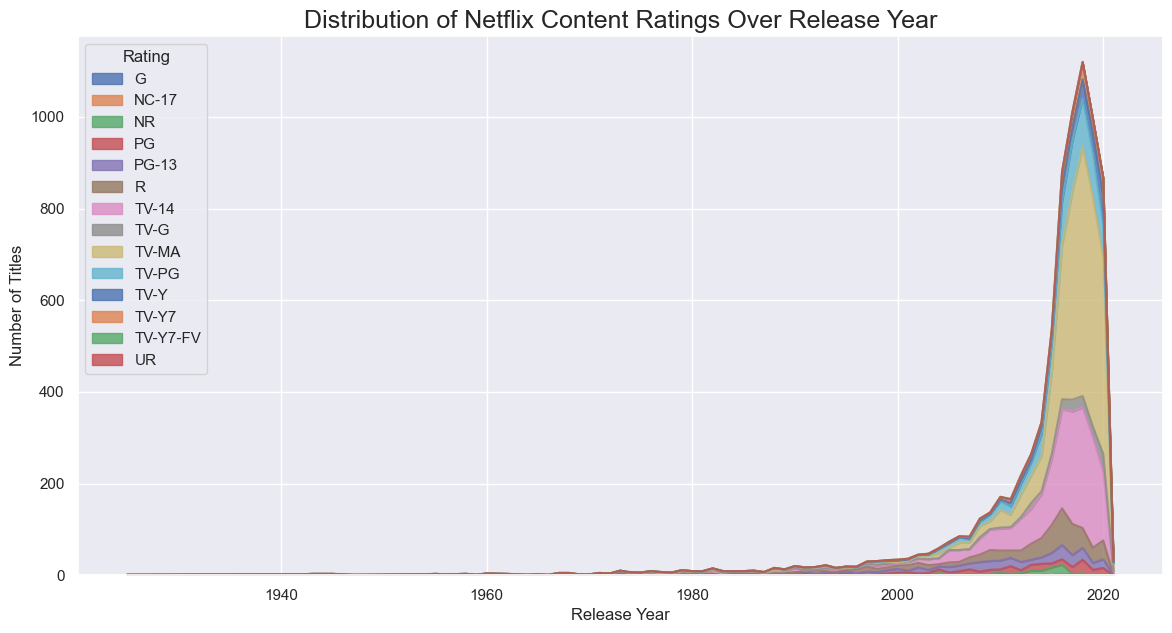

In [8]:
# Group by release_year and rating to see changes over time
rating_over_release_year = (
    netflix_df.groupby(["release_year", "rating"]).size().unstack().fillna(0)
)

plt.figure(figsize=(14, 7))
rating_over_release_year.plot(kind="area", stacked=True, figsize=(14, 7), alpha=0.8)
plt.title("Distribution of Netflix Content Ratings Over Release Year", fontsize=18)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.show()

**Insights**:
- **1920-2008**: Most of the titles released are generally UR or R
- **2008–2012**: Very few titles were added, mostly with adult-oriented ratings like TV-MA.
- **2013–2016**: A broader mix appeared — more TV-14, PG-13, and PG content joined.
- **2017–2020**: There’s a sharp growth in all categories, especially TV-MA (mature content) and TV-14 (teen-friendly).
- Children’s ratings (TV-Y, TV-Y7, G, PG) grew as well, but at a much smaller scale compared to mature content.

Overall, Netflix’s library has increasingly leaned towards mature-rated shows (TV-MA), while still expanding in family and teen-friendly categories.

### Q.2 Is there a relationship between content age and its type (Movie vs. TV Show)?<a id='q2'></a>

Here content'age is assumed as how old the content was when it was added to Netflix. In this there are some old rows are present, which has `age_on_netflix` in negative (where `added_year` is before `release_year`). So we are not considering them.

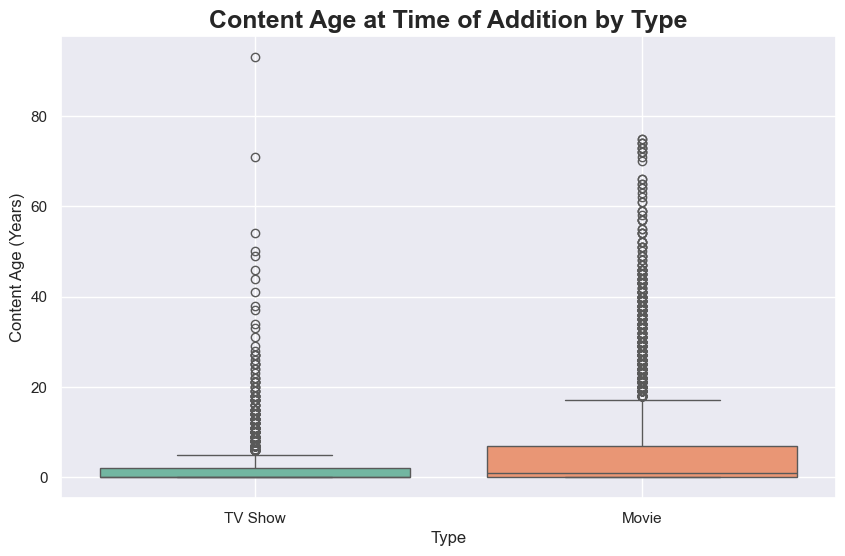

In [9]:
# Create the 'age_on_netflix' feature
netflix_df["age_on_netflix"] = netflix_df["year_added"] - netflix_df["release_year"]

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df["age_on_netflix"] >= 0]

plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x="type", y="age_on_netflix", palette="Set2", hue="type")

plt.title("Content Age at Time of Addition by Type", fontsize=18, weight="bold")
plt.xlabel("Type")
plt.ylabel("Content Age (Years)")
plt.grid(True)
plt.show()

**Insights**:
- Movies → Netflix adds both young and old movies, but the older movies are also a lot.
- TV Shows → usually newer (Netflix often adds them soon after release).

### Q.3 Can we identify any trends in content production based on the release year vs. the year added to Netflix? <a id='q3'></a>

We use the above `contect_age` data to solve this. We solve this by first finding the average gap between release and year added on netflix per year. Secondly, we find the relationship between titles released and when it is added to netflix.

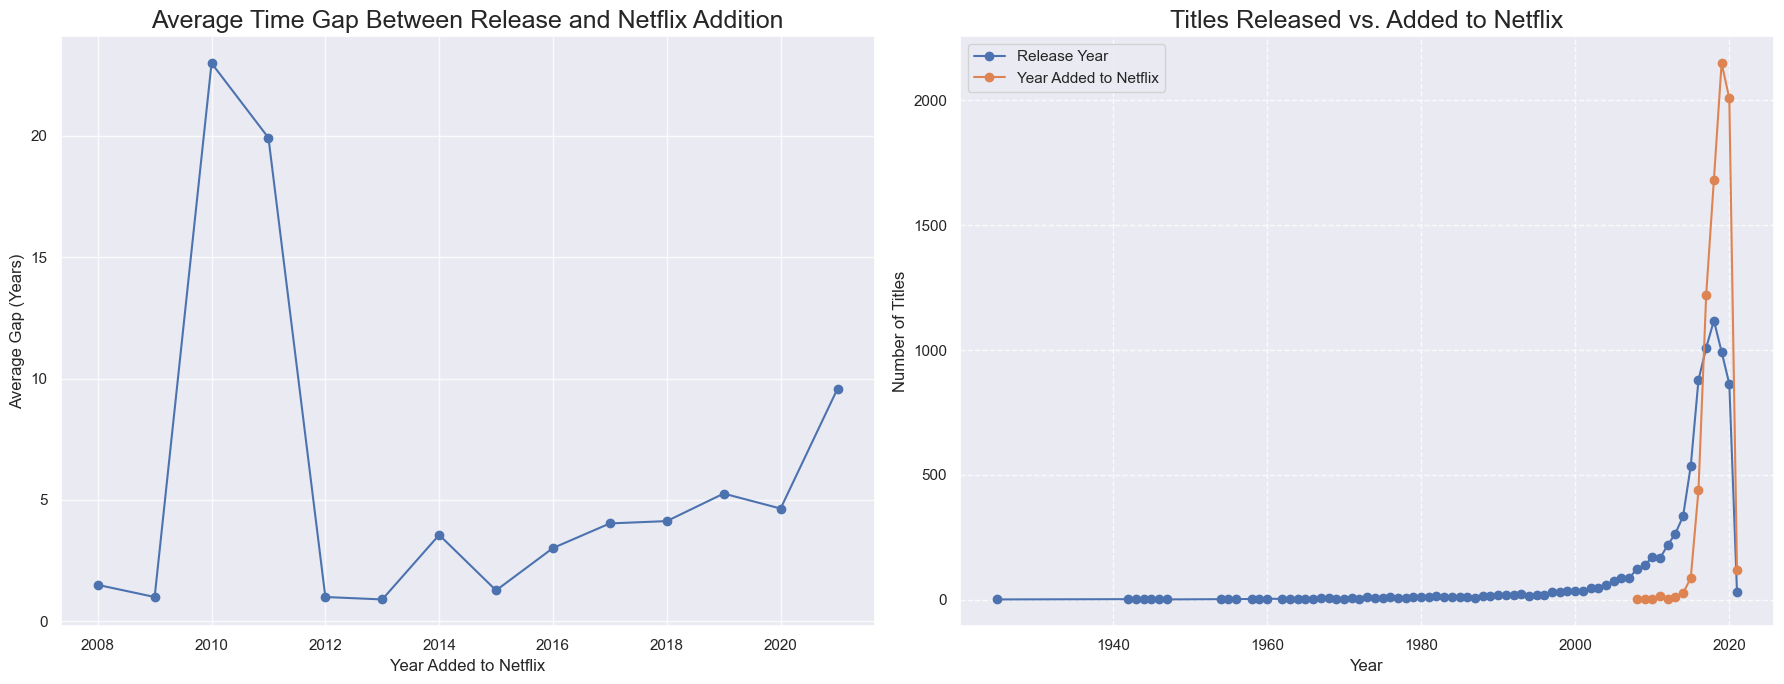

In [10]:
# 1. Average gap per year
avg_gap = content_age.groupby("year_added")["age_on_netflix"].mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
avg_gap.plot(ax=axes[0], marker="o").set_title(
    "Average Time Gap Between Release and Netflix Addition", fontsize=18
)
axes[0].set_xlabel("Year Added to Netflix")
axes[0].set_ylabel("Average Gap (Years)")
axes[0].grid(True, linestyle="-", alpha=0.8)

# 2. Released vs Added
released_per_year = content_age["release_year"].value_counts().sort_index()
added_per_year = content_age["year_added"].value_counts().sort_index()

axes[1].plot(
    released_per_year.index,
    released_per_year.values,
    label="Release Year",
    marker="o",
)
axes[1].plot(
    added_per_year.index,
    added_per_year.values,
    label="Year Added to Netflix",
    marker="o",
)
axes[1].set_title("Titles Released vs. Added to Netflix", fontsize=18)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Titles")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.8)

plt.tight_layout()
plt.show()

**Insights**:
- Before-2015: Mostly older content being licensed on netflix as the gap between the release and addition to netflix is large (plot 1).
- After 2015: More titles being added on netflix soon after release and the gap started shrinking.
- After 2017+: We saw the Netflix Original boom, as the release year becomes almost equal to the  Added year (gap close to zero).
- Movies still often have a slight delay, while TV Shows are closer to real-time.

### Q.4 What are the most common word pairs or phrases in content description? <a id='q4'></a>

In [11]:
# Combine all descriptions into a single string
text = " ".join(netflix_df["description"].dropna().str.lower())

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from collections import Counter


# Download stopwords if not already
nltk.download("stopwords")

# Combine all descriptions
text = " ".join(netflix_df["description"].dropna().astype(str).str.lower())

# Tokenize
tokens = [word for word in text.split() if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word not in stop_words]

# Create bigrams
bigram_list = list(bigrams(tokens))

# Count frequency of bigrams
bigram_counts = Counter(bigram_list)

# Convert bigram tuples to strings
bigram_dict = {" ".join(k): v for k, v in bigram_counts.items()}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajanti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


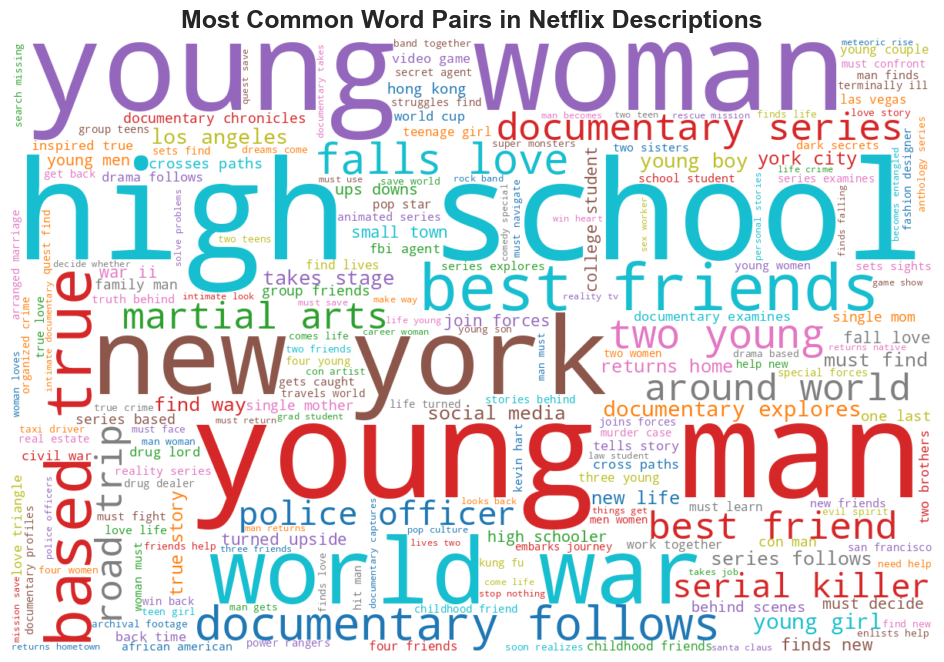

In [13]:
# Generate word cloud
wordcloud = WordCloud(
    width=1200, height=800, background_color="white", colormap="tab10"
)
wordcloud.generate_from_frequencies(bigram_dict)

# Plot
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Word Pairs in Netflix Descriptions", fontsize=18, weight="bold")
plt.show()

**Insight**: Most common words are 'young man', 'high school', 'young woman', world war', 'new york', 'best friend', etc.

### Q.5 Who are the top directors on Netflix? <a id='q5'></a>
We have solved this in 2 ways
- In this the unknowns values of directors are not taken into consideration
- In this the unknowns values are taken into consideration (as 59% of the directors are unknown in this dataset).

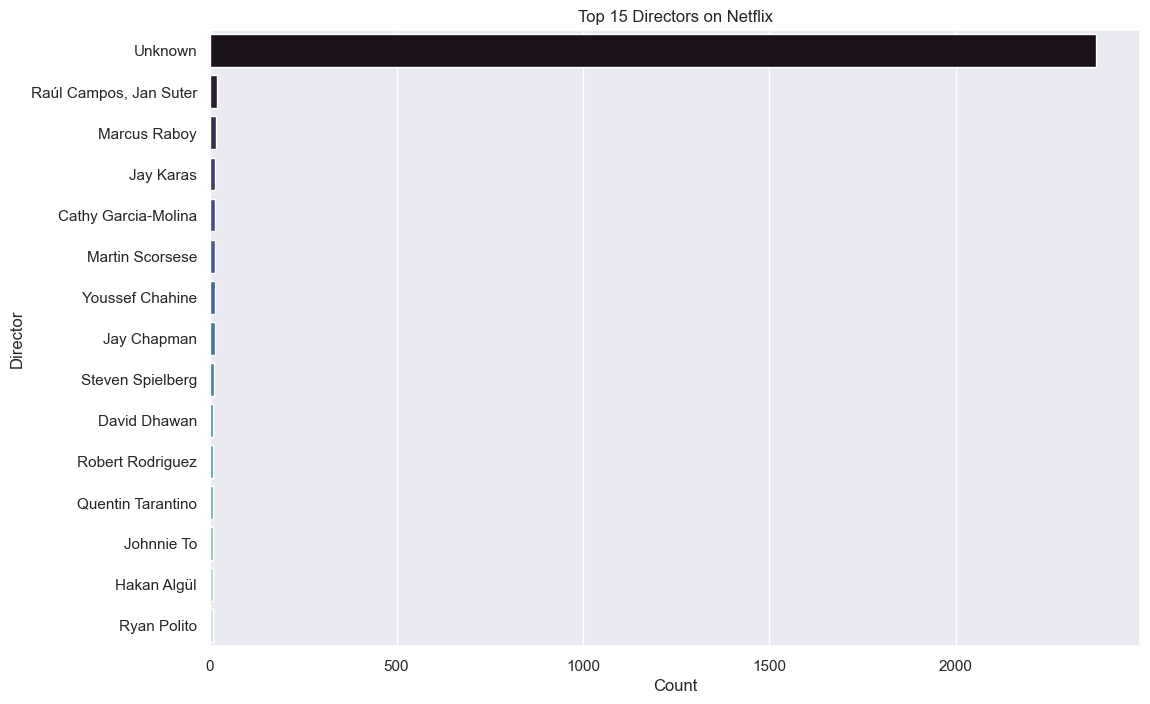

In [14]:
top_director_count = netflix_df["director"].value_counts().reset_index()
top_director_count.columns = ["director", "count"]

# Select only the top 15 for plotting
top_director_count_plot = top_director_count.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_director_count_plot,
    y="director",
    x="count",
    palette="mako",
    hue="director",
    legend=False,
).set_title("Top 15 Directors on Netflix")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

**Insights**: More than half of the titles on netflix have 'UNKNOWN' (59%). 'Raúl Campos, Jan Suter' have directed the most (18 titles on netflix, which are known), with 'Marcus Raboy' at 16 and so on. The netflix dataset is not sufficient to find the top directors as more than half of the titles director is unknown.

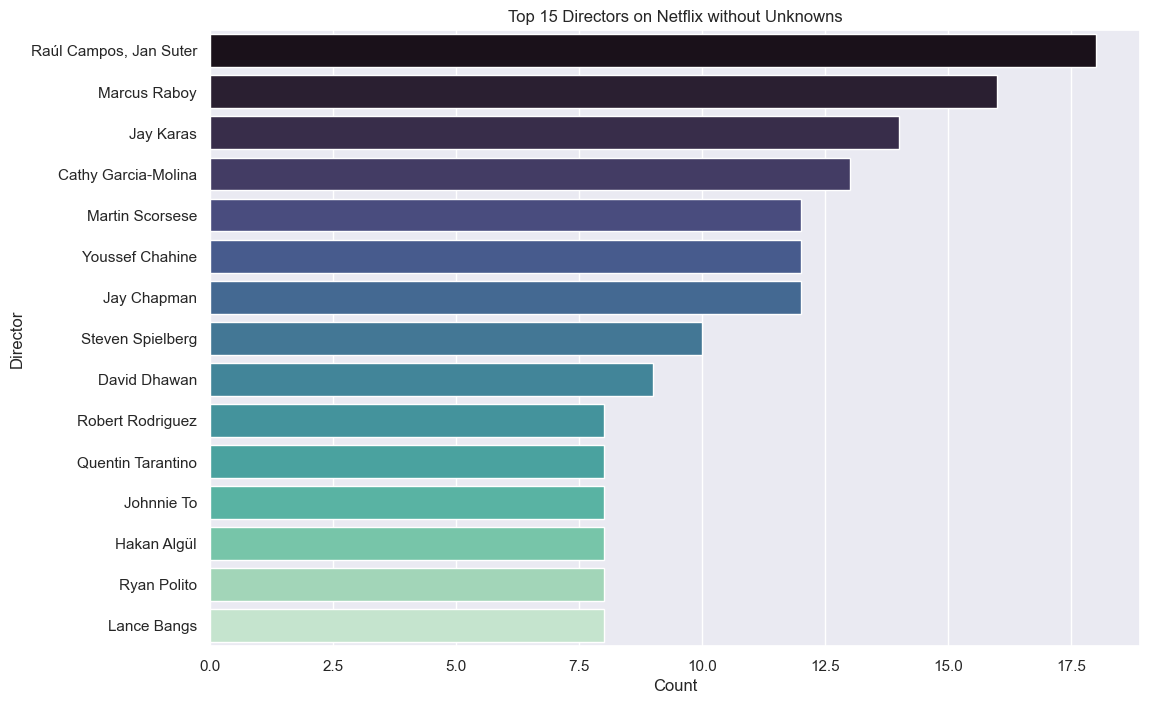

In [15]:
# top 15 directors without the 'Unknown's
top_director_without_unknown_plot = top_director_count[1:16]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_director_without_unknown_plot,
    y="director",
    x="count",
    palette="mako",
    hue="director",
    legend=False,
).set_title("Top 15 Directors on Netflix without Unknowns")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()